In [42]:
order = [35.1, 22.9, 23.9, 29.0, 36.1, 35.9, 31.2, 6.0, 37.3, 24.4, 27.6, 26.3, 24.0, 44.0, 35.5, 27.1, 30.3, 17.7, 30.9, 20.2, 17.3, 26.6, 21.3, 40.7, 30.1, 43.2, 28.3, 24.5, 32.0, 27.8, 26.5, 26.0, 35.3, 24.8, 22.5, 26.9, 31.8, 31.3, 19.3, 31.6, 18.5, 32.8, 25.4, 41.3, 24.1, 37.6, 37.5, 27.8, 13.1, 24.7, 31.3, 20.7, 25.0, 30.4, 23.0, 11.2, 26.5, 19.8, 25.6, 22.3]
order.sort()
print(order)

[6.0, 11.2, 13.1, 17.3, 17.7, 18.5, 19.3, 19.8, 20.2, 20.7, 21.3, 22.3, 22.5, 22.9, 23.0, 23.9, 24.0, 24.1, 24.4, 24.5, 24.7, 24.8, 25.0, 25.4, 25.6, 26.0, 26.3, 26.5, 26.5, 26.6, 26.9, 27.1, 27.6, 27.8, 27.8, 28.3, 29.0, 30.1, 30.3, 30.4, 30.9, 31.2, 31.3, 31.3, 31.6, 31.8, 32.0, 32.8, 35.1, 35.3, 35.5, 35.9, 36.1, 37.3, 37.5, 37.6, 40.7, 41.3, 43.2, 44.0]


In [43]:
import math
import numpy as np
import matplotlib.pyplot as plt

order_counts = len(order)
x_min = min(order)
x_max = max(order)
diff = x_max - x_min
counts_intrvals = math.ceil(1 + 3.322 * math.log(order_counts))
len_intervals = math.ceil(diff/counts_intrvals)
x0 = x_min - len_intervals/2
unique_values, var_counts = np.unique(order, return_counts=True)

intervals = []
frequencies = []

for i in range(counts_intrvals):
    end = x0 + len_intervals
    intervals.append((round(x0, 2), round(end, 2)))
    
    freq = sum(1 for x in order if x0 <= x < end)
    frequencies.append(freq)
    
    x0 = end

if max(order) >= intervals[-1][1]:
    frequencies[-1] += 1

print("Интервальный статистический ряд:")
print(f"{'Интервал':<30} {'Частота':<30} {'Отн. вероятность':<30} {'Отношение частоты к частичному интервалу':<30}")
for i, freq in zip(intervals, frequencies):
    print(f"{str(i):<30} {freq:<30} {round(freq/order_counts,2):<30} {round(freq/(order_counts*len_intervals),3):<30}")


Интервальный статистический ряд:
Интервал                       Частота                        Отн. вероятность               Отношение частоты к частичному интервалу
(4.5, 7.5)                     1                              0.02                           0.006                         
(7.5, 10.5)                    0                              0.0                            0.0                           
(10.5, 13.5)                   2                              0.03                           0.011                         
(13.5, 16.5)                   0                              0.0                            0.0                           
(16.5, 19.5)                   4                              0.07                           0.022                         
(19.5, 22.5)                   5                              0.08                           0.028                         
(22.5, 25.5)                   12                             0.2                        

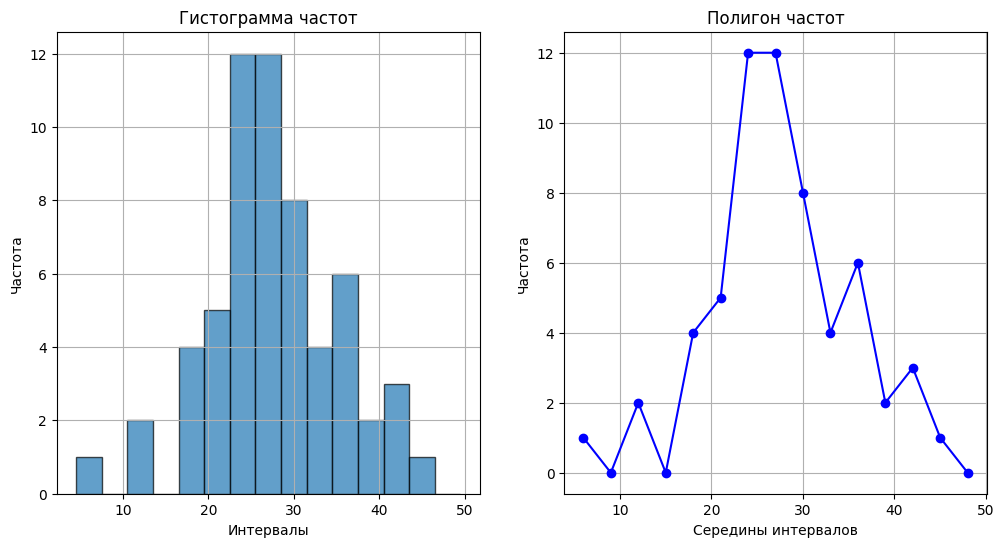

In [44]:
x0 = x_min - len_intervals/2
intervals_ = [x0 + i * len_intervals for i in range(counts_intrvals + 1)]

midpoints = [(intervals_[i] + intervals_[i + 1]) / 2 for i in range(len(intervals_) - 1)]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(order, bins=intervals_, edgecolor='black', alpha=0.7)
plt.title('Гистограмма частот')
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(midpoints, frequencies, marker='o', linestyle='-', color='b')
plt.title('Полигон частот')
plt.xlabel('Середины интервалов')
plt.ylabel('Частота')
plt.grid(True)

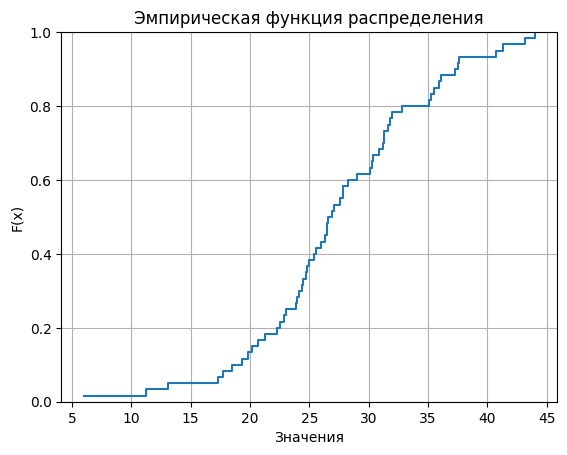

In [45]:
empirical_cdf = [i / order_counts for i in range(1, order_counts + 1)]

plt.step(order, empirical_cdf, where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [46]:
from collections import Counter

mean_value = round(sum(order) / order_counts,3)
corrected_variance = round(sum((x - mean_value) ** 2 for x in order) / (order_counts - 1), 3)

frequency = Counter(order)
mode = round(max(frequency.keys(), key=frequency.get),3)

if order_counts % 2 == 1: 
    median = order[order_counts // 2]
else:
    mid1 = order[order_counts // 2 - 1]
    mid2 = order[order_counts // 2]
    median = (mid1 + mid2) / 2

std_dev = corrected_variance ** 0.5

asymmetry = (order_counts / ((order_counts - 1) * (order_counts - 2))) *  sum(((x - mean_value) / std_dev) ** 3 for x in order)

if order_counts > 3:
    n = order_counts
    excess = (
        (n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3)) * sum(((x - mean_value) / std_dev) ** 4 for x in order)
        - 3 * (n - 1) ** 2 / ((n - 2) * (n - 3))
    )
    excess = round(excess,3)
else:
    excess = None

if n > 2:
    asymmetry = (n / ((n - 1) * (n - 2))) * sum(((x - mean_value) / std_dev) ** 3 for x in order)
    asymmetry = round(asymmetry,3)

print(f' Выборочное среднее = {mean_value}', '\n',
      f'Исправленная выборочная дисперсия = {corrected_variance}', '\n',
      f'Мода = {mode}', '\n',
      f'Медиана = {median}', '\n',
      f'Эксцесс = {excess}', '\n',
      f'Ассиметрия = {asymmetry}', '\n')

 Выборочное среднее = 27.53 
 Исправленная выборочная дисперсия = 56.585 
 Мода = 26.5 
 Медиана = 26.75 
 Эксцесс = 0.517 
 Ассиметрия = -0.139 



In [47]:
# Вычисление параметров
# mean = np.mean(data)  # Математическое ожидание (mu)
# std_dev = np.std(data, ddof=1)  # Стандартное отклонение (sigma)

print(f"Математическое ожидание (a): {mean_value:.2f}")
print(f"Стандартное отклонение (sigma): {std_dev:.2f}")

Математическое ожидание (a): 27.53
Стандартное отклонение (sigma): 7.52


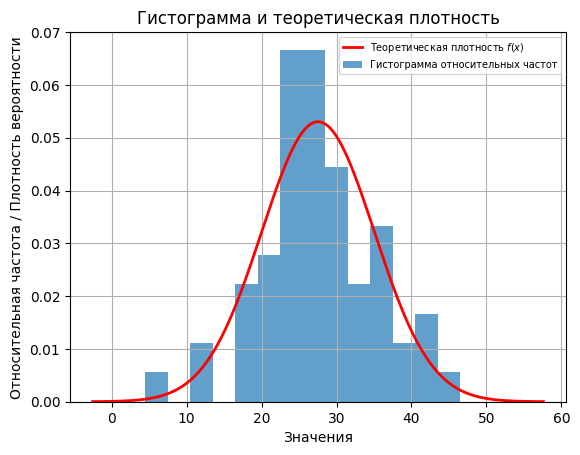

In [48]:
from scipy.stats import norm
# Диапазон значений x для построения графика
x = np.linspace(mean_value - 4 * std_dev, mean_value + 4 * std_dev, 1000)
# Теоретическая плотность вероятности
f_x = norm.pdf(x, loc=mean_value, scale=std_dev)
# Теоретическая функция распределения
F_x = norm.cdf(x, loc=mean_value, scale=std_dev)
total_area = sum(frequencies[i] * (intervals[i][1] - intervals[i][0]) for i in range(len(intervals)))
normalized_heights = [freq / total_area for freq in frequencies]
plt.bar(
    [interval[0] for interval in intervals],  # Левая граница интервала
    normalized_heights,  # Нормированные высоты столбцов
    width=[interval[1] - interval[0] for interval in intervals],  # Ширина столбца
    align='edge',  # Выравнивание по краю интервала
    alpha=0.7,  # Прозрачность
    label='Гистограмма относительных частот'  # Подпись для легенды
)

# Накладываем теоретическую плотность на гистограмму
plt.plot(x, f_x, 'r-', lw=2, label='Теоретическая плотность $ f(x) $')

# Настройка графика
plt.title('Гистограмма и теоретическая плотность')
plt.xlabel('Значения')
plt.ylabel('Относительная частота / Плотность вероятности')
plt.legend(fontsize=7)  # Добавляем легенду
plt.grid(True)  # Добавляем сетку
plt.show()


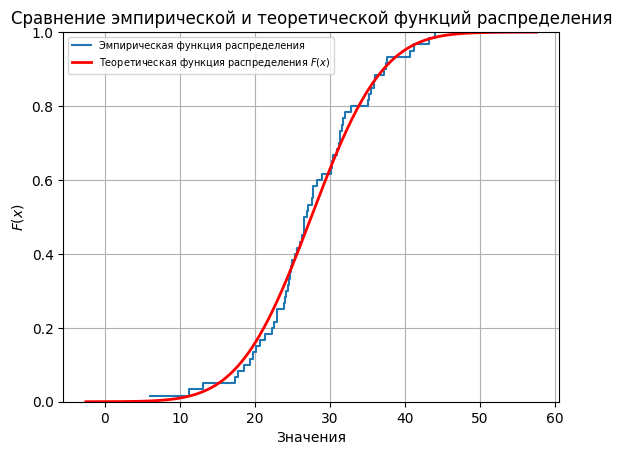

In [49]:
plt.step(order, empirical_cdf, where='post', label='Эмпирическая функция распределения')
plt.plot(x, F_x, 'r-', lw=2, label='Теоретическая функция распределения $ F(x) $')

# Настройка графика
plt.title('Сравнение эмпирической и теоретической функций распределения')
plt.xlabel('Значения')
plt.ylabel('$ F(x) $')
plt.ylim(0, 1)  # Ограничение по оси Y от 0 до 1
plt.grid(True)  # Добавляем сетку
plt.legend(fontsize=7)  # Легенда с уменьшенным размером текста
plt.show()

In [50]:
# Границы трёх сигм
lower_bound = mean_value - 3 * std_dev
upper_bound = mean_value + 3 * std_dev

data_numpy = np.array(order)
# Находим выбросы
inliers = data_numpy[(data_numpy >= lower_bound) & (data_numpy <= upper_bound)]

# Процент значений внутри границ
percentage_inside = len(inliers) / len(data_numpy) * 100

# Проверяем выполнение правила (99.7% данных должны быть в пределах)
rule_satisfied = percentage_inside >= 99.7
print(f"Правило 3 сигм {'выполняется' if rule_satisfied else 'не выполняется'}")

Правило 3 сигм выполняется


In [51]:
from scipy.stats import chi2

def pearson_chi2_test(intervals, frequencies, distribution='norm', alpha=0.05):
    """
    Проверяет гипотезу о распределении с помощью критерия χ² Пирсона.
    
    Параметры:
    - intervals: список кортежей границ интервалов [(a1, a2), (a2, a3), ...]
    - frequencies: массив наблюдаемых частот для каждого интервала
    - distribution: 'norm' (нормальное)
    - alpha: уровень значимости
    
    Возвращает:
    - chi2_stat: статистика χ²
    - p_value: p-значение
    - critical_value: критическое значение
    - reject_H0: отвергается ли H₀
    """
    # Преобразуем интервалы в границы bins
    bin_edges = np.unique(np.array(intervals).flatten())
    n = sum(frequencies)  # Общее количество наблюдений
    
    # Вычисляем ожидаемые частоты
    if distribution == 'norm':
        # Оценим параметры по данным (можно передать явно)
        sample = np.concatenate([np.linspace(a, b, freq) 
                               for (a,b), freq in zip(intervals, frequencies)])
        mu, sigma = np.mean(sample), np.std(sample)
        expected = n * (norm.cdf(bin_edges[1:], mu, sigma) - 
                       norm.cdf(bin_edges[:-1], mu, sigma))
        
    # Фильтруем интервалы с expected >= 5
    mask = expected >= 5
    if sum(mask) < 3:
        raise ValueError("После фильтрации осталось <3 интервалов")
    
    observed = np.array(frequencies)[mask]
    expected = expected[mask]
    
    # Вычисляем χ² статистику
    chi2_stat = np.sum((observed - expected)**2 / expected)
    dof = len(observed) - 1 - (2 if distribution == 'norm' else 0)
    
    # Критическое значение и p-value
    critical_value = chi2.ppf(1 - alpha, dof)
    p_value = 1 - chi2.cdf(chi2_stat, dof)
    
    return {
        'chi2_stat': chi2_stat,
        'p_value': p_value,
        'critical_value': critical_value,
        'reject_H0': chi2_stat > critical_value,
        'observed': observed,
        'expected': expected,
        'used_intervals': [intervals[i] for i in np.where(mask)[0]]
    }

# Тест для нормального распределения
result_norm = pearson_chi2_test(intervals, frequencies, 'norm')
print(f"Нормальное распределение: χ²={result_norm['chi2_stat']:.2f}, p={result_norm['p_value']:.3f}")
print(f"Гипотеза о нормальном распределении {'отвергается' if result_norm['reject_H0'] else 'принимается'}")

Нормальное распределение: χ²=4.43, p=0.218
Гипотеза о нормальном распределении принимается


In [52]:
from scipy.stats import t
def confidence_intervals(data, gamma=0.95):
    """
    Вычисляет доверительные интервалы для генеральной средней и среднеквадратичного отклонения.
    
    Параметры:
    - data: массив данных
    - gamma: уровень надежности (по умолчанию 0.95)
    
    Возвращает:
    - ci_mean: доверительный интервал для генеральной средней (кортеж float)
    - ci_std: доверительный интервал для генерального среднеквадратичного отклонения (кортеж float)
    """
    # Исходные параметры
    n = len(data)  # Объем выборки
    x_bar = np.mean(data)  # Выборочное среднее
    s = np.std(data, ddof=1)  # Выборочное стандартное отклонение (с поправкой на несмещённость)
    alpha = 1 - gamma  # Уровень значимости
    
    # Доверительный интервал для генеральной средней
    if n >= 30:  # Большая выборка -> нормальное распределение
        z = norm.ppf(1 - alpha / 2)
        ci_mean = (
            float(x_bar - z * s / np.sqrt(n)), 
            float(x_bar + z * s / np.sqrt(n))
        )
    else:  # Малая выборка -> распределение Стьюдента
        t_val = t.ppf(1 - alpha / 2, df=n - 1)
        ci_mean = (
            float(x_bar - t_val * s / np.sqrt(n)), 
            float(x_bar + t_val * s / np.sqrt(n))
        )
    
    # Доверительный интервал для генерального среднеквадратичного отклонения
    chi2_lower = chi2.ppf(alpha / 2, df=n - 1)
    chi2_upper = chi2.ppf(1 - alpha / 2, df=n - 1)
    ci_std = (
        float(np.sqrt((n - 1) * s**2 / chi2_upper)),
        float(np.sqrt((n - 1) * s**2 / chi2_lower))
    )
    
    return {
        'ci_mean': ci_mean,
        'ci_std': ci_std
    }
result = confidence_intervals(data_numpy)

print(f"Доверительный интервал для генеральной средней: ({result['ci_mean'][0]:.2f}, {result['ci_mean'][1]:.2f})")
print(f"Доверительный интервал для генерального среднеквадратичного отклонения: ({result['ci_std'][0]:.2f}, {result['ci_std'][1]:.2f})")

Доверительный интервал для генеральной средней: (25.63, 29.43)
Доверительный интервал для генерального среднеквадратичного отклонения: (6.38, 9.17)


In [53]:
mu_hat = np.mean(order)
sigma_hat = np.std(order, ddof=1)  # несмещённая оценка
print(f"Оценки для N(μ, σ²): μ = {mu_hat:.3f}, σ = {sigma_hat:.3f}")

Оценки для N(μ, σ²): μ = 27.530, σ = 7.522
